In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import sklearn.metrics as met
import statsmodels.formula.api as smf
import seaborn as sns
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [108]:
data = pd.read_csv("D:\\IPBA\\Statistical Modelling\\2. Linear Regression in Python Demo Part 2\\2. Linear Regression in Python Demo Part 2\\mktmix.csv")
print(data.shape)
data.head()

(104, 9)


,NewVolSales,Base_Price,Radio,InStore,NewspaperInserts,Discount,TV,Stout,Website_Campaign
0,19564,15.029276,245.0,15.452,NaN,0.000,101.780000,2.28342,NaN
1,19387,15.029276,314.0,16.388,NaN,0.000,76.734000,2.22134,NaN
2,23889,14.585093,324.0,62.692,NaN,0.050,131.590200,2.00604,NaN
3,20055,15.332887,298.0,16.573,NaN,0.000,119.627060,2.19897,NaN
4,20064,15.642632,279.0,41.504,NaN,0.045,103.438118,1.81860,NaN


In [109]:
data = data.round(decimals=2)
data.describe()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout
count,104.000000,104.000000,100.000000,104.000000,104.000000,104.000000,104.000000
mean,20171.067308,15.306923,256.690000,32.918942,0.021731,141.009808,2.546058
std,1578.604670,0.528535,86.994682,13.682710,0.027393,42.949118,0.309856
min,17431.000000,13.740000,0.000000,10.780000,0.000000,37.660000,1.820000
25%,19048.750000,15.030000,235.000000,22.185000,0.000000,117.112500,2.317500
50%,19943.500000,15.330000,278.500000,31.165000,0.000000,138.580000,2.500000
75%,20942.750000,15.640000,313.250000,41.080000,0.050000,175.680000,2.815000
max,24944.000000,16.280000,399.000000,68.120000,0.090000,240.290000,3.160000


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NewVolSales        104 non-null    int64  
 1   Base_Price         104 non-null    float64
 2   Radio              100 non-null    float64
 3   InStore            104 non-null    float64
 4   NewspaperInserts   6 non-null      object 
 5   Discount           104 non-null    float64
 6   TV                 104 non-null    float64
 7   Stout              104 non-null    float64
 8   Website_Campaign   14 non-null     object 
dtypes: float64(6), int64(1), object(2)
memory usage: 7.4+ KB


In [146]:
#Base_Price variable analysis
data['Base_Price'].describe()

count    104.000000
mean      15.348277
std        0.466272
min       14.300000
25%       15.030000
50%       15.330000
75%       15.640000
max       16.280000
Name: Base_Price, dtype: float64

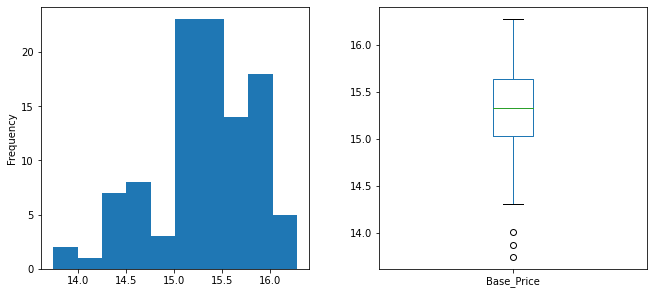

In [114]:
fig = plt.figure(figsize = [10,5])
plt.subplot(1,2,1)
data['Base_Price'].plot(kind='hist')
plt.subplot(1,2,2)
data['Base_Price'].plot(kind='box')
fig.tight_layout(pad=4.0)

In [115]:
data['Base_Price'].quantile(np.arange(0,1,0.1))

0.0    13.74
0.1    14.59
0.2    14.97
0.3    15.03
0.4    15.18
0.5    15.33
0.6    15.49
0.7    15.64
0.8    15.80
0.9    15.96
Name: Base_Price, dtype: float64

In [116]:
outlier = data['Base_Price'].quantile(0.02)
outlier

14.0274

In [117]:
data.loc[data['Base_Price'] < outlier ]

,NewVolSales,Base_Price,Radio,InStore,NewspaperInserts,Discount,TV,Stout,Website_Campaign
74,24468,13.74,251.0,37.84,NaN,0.05,135.15,2.66,NaN
75,22495,14.01,247.0,45.31,NaN,0.00,117.69,2.84,NaN
76,21710,13.87,261.0,34.22,NaN,0.00,148.71,2.98,NaN


In [118]:
data.loc[data['Base_Price'] < outlier , 'Base_Price'] = data['Base_Price'].mean()

In [119]:
data['Base_Price'].describe()

count    104.000000
mean      15.348277
std        0.466272
min       14.300000
25%       15.030000
50%       15.330000
75%       15.640000
max       16.280000
Name: Base_Price, dtype: float64

In [120]:
#NewVolSales Analysis(Target Variable)
data['NewVolSales'].describe()

count      104.000000
mean     20171.067308
std       1578.604670
min      17431.000000
25%      19048.750000
50%      19943.500000
75%      20942.750000
max      24944.000000
Name: NewVolSales, dtype: float64

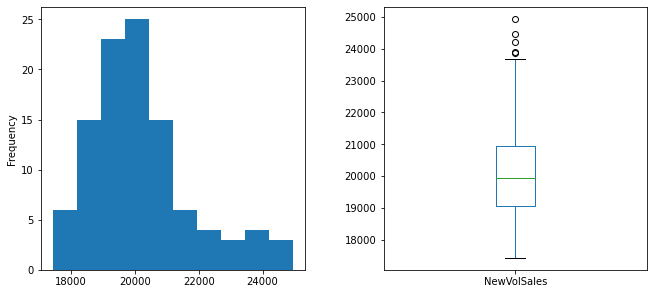

In [124]:
fig = plt.figure(figsize = [10,5])
plt.subplot(1,2,1)
data['NewVolSales'].plot(kind='hist')
plt.subplot(1,2,2)
data['NewVolSales'].plot(kind='box')
fig.tight_layout(pad=4.0)

In [122]:
#Radio
data.rename(columns = {'Radio ':'Radio'} , inplace=True)
data['Radio'].describe()

count    100.000000
mean     256.690000
std       86.994682
min        0.000000
25%      235.000000
50%      278.500000
75%      313.250000
max      399.000000
Name: Radio, dtype: float64

In [78]:
R = data['Radio']
Rdf = pd.DataFrame(R)

In [97]:
imp = SimpleImputer(missing_values=np.nan , strategy='mean')
imp.fit(Rdf)
temp = imp.transform(Rdf)

In [125]:
data.loc[:,'Radio'] = temp

In [135]:
data.head()

,NewVolSales,Base_Price,Radio,InStore,NewspaperInserts,Discount,TV,Stout,Website_Campaign
0,19564,15.03,245.0,15.45,NaN,0.00,101.78,2.28,NaN
1,19387,15.03,314.0,16.39,NaN,0.00,76.73,2.22,NaN
2,23889,14.59,324.0,62.69,NaN,0.05,131.59,2.01,NaN
3,20055,15.33,298.0,16.57,NaN,0.00,119.63,2.20,NaN
4,20064,15.64,279.0,41.50,NaN,0.04,103.44,1.82,NaN


In [127]:
data['Radio'].describe()

count    104.000000
mean     256.690000
std       85.288738
min        0.000000
25%      235.750000
50%      276.000000
75%      312.250000
max      399.000000
Name: Radio, dtype: float64

In [134]:
#WebsiteCampaigns
data.rename(columns={'Website_Campaign ':'Website_Campaign'} , inplace=True)
data['Website_Campaign'].value_counts()

Website Campaign     6
Twitter              4
Facebook             4
Name: Website_Campaign, dtype: int64

In [143]:
corr=data.corr()
corr

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout
NewVolSales,1.000000,-0.668370,0.046524,0.441688,0.432376,0.145300,-0.375914
Base_Price,-0.668370,1.000000,-0.002848,-0.221879,-0.237356,0.060608,0.048191
Radio,0.046524,-0.002848,1.000000,-0.017798,0.111185,-0.061895,-0.184108
InStore,0.441688,-0.221879,-0.017798,1.000000,0.728354,-0.015752,0.024964
Discount,0.432376,-0.237356,0.111185,0.728354,1.000000,0.113155,-0.024124
TV,0.145300,0.060608,-0.061895,-0.015752,0.113155,1.000000,-0.126744
Stout,-0.375914,0.048191,-0.184108,0.024964,-0.024124,-0.126744,1.000000


<AxesSubplot:>

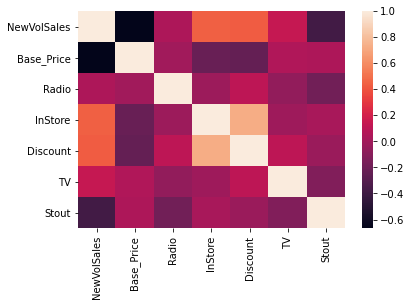

In [145]:
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

In [149]:
def bucketing(x) :
    if x < 15:
        return "Low"
    elif (x > 15) & (x < 15.33):
        return "Medium"
    else : 
        return "High"

In [150]:
data['Price_Bucket'] = data['Base_Price'].map(bucketing)

In [151]:
data.head()

,NewVolSales,Base_Price,Radio,InStore,NewspaperInserts,Discount,TV,Stout,Website_Campaign,Price_Bucket
0,19564,15.03,245.0,15.45,NaN,0.00,101.78,2.28,NaN,Medium
1,19387,15.03,314.0,16.39,NaN,0.00,76.73,2.22,NaN,Medium
2,23889,14.59,324.0,62.69,NaN,0.05,131.59,2.01,NaN,Low
3,20055,15.33,298.0,16.57,NaN,0.00,119.63,2.20,NaN,High
4,20064,15.64,279.0,41.50,NaN,0.04,103.44,1.82,NaN,High


In [152]:
data['Price_Bucket'].value_counts()

High      60
Medium    26
Low       18
Name: Price_Bucket, dtype: int64

In [155]:
data = pd.get_dummies(data , columns=['NewspaperInserts' , 'Website_Campaign'])

In [160]:
data.head()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout,Price_Bucket,NewspaperInserts_Insert,Website_Campaign_Facebook,Website_Campaign_Twitter,Website_Campaign_Website Campaign
0,19564,15.03,245.0,15.45,0.00,101.78,2.28,Medium,0,0,0,0
1,19387,15.03,314.0,16.39,0.00,76.73,2.22,Medium,0,0,0,0
2,23889,14.59,324.0,62.69,0.05,131.59,2.01,Low,0,0,0,0
3,20055,15.33,298.0,16.57,0.00,119.63,2.20,High,0,0,0,0
4,20064,15.64,279.0,41.50,0.04,103.44,1.82,High,0,0,0,0


In [168]:
data.rename(columns={'Website_Campaign_Website Campaign ':'Website_Campaign_Website Campaign'},inplace=True)
data['Online'] = data['Website_Campaign_Facebook'] + data['Website_Campaign_Twitter'] + data['Website_Campaign_Website Campaign']

In [169]:
data.head()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout,Price_Bucket,NewspaperInserts_Insert,Website_Campaign_Facebook,Website_Campaign_Twitter,Website_Campaign_Website Campaign,Online
0,19564,15.03,245.0,15.45,0.00,101.78,2.28,Medium,0,0,0,0,0
1,19387,15.03,314.0,16.39,0.00,76.73,2.22,Medium,0,0,0,0,0
2,23889,14.59,324.0,62.69,0.05,131.59,2.01,Low,0,0,0,0,0
3,20055,15.33,298.0,16.57,0.00,119.63,2.20,High,0,0,0,0,0
4,20064,15.64,279.0,41.50,0.04,103.44,1.82,High,0,0,0,0,0


In [170]:
data['Offline_spend'] = data['Radio'] + data['InStore']

In [171]:
data.head()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout,Price_Bucket,NewspaperInserts_Insert,Website_Campaign_Facebook,Website_Campaign_Twitter,Website_Campaign_Website Campaign,Online,Offline_spend
0,19564,15.03,245.0,15.45,0.00,101.78,2.28,Medium,0,0,0,0,0,260.45
1,19387,15.03,314.0,16.39,0.00,76.73,2.22,Medium,0,0,0,0,0,330.39
2,23889,14.59,324.0,62.69,0.05,131.59,2.01,Low,0,0,0,0,0,386.69
3,20055,15.33,298.0,16.57,0.00,119.63,2.20,High,0,0,0,0,0,314.57
4,20064,15.64,279.0,41.50,0.04,103.44,1.82,High,0,0,0,0,0,320.50


In [176]:
data.corr()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout,NewspaperInserts_Insert,Website_Campaign_Facebook,Website_Campaign_Twitter,Website_Campaign_Website Campaign,Online,Offline_spend
NewVolSales,1.000000,-0.668370,0.046524,0.441688,0.432376,0.145300,-0.375914,-0.063405,-0.120919,0.189616,-0.228730,-0.117546,0.116225
Base_Price,-0.668370,1.000000,-0.002848,-0.221879,-0.237356,0.060608,0.048191,0.075572,0.246419,-0.166274,-0.127947,-0.042248,-0.038064
Radio,0.046524,-0.002848,1.000000,-0.017798,0.111185,-0.061895,-0.184108,-0.064688,0.103820,0.096751,-0.132224,0.022683,0.987308
InStore,0.441688,-0.221879,-0.017798,1.000000,0.728354,-0.015752,0.024964,-0.053162,-0.104231,0.010517,0.127673,0.034416,0.141223
Discount,0.432376,-0.237356,0.111185,0.728354,1.000000,0.113155,-0.024124,-0.015709,-0.049380,-0.049380,-0.015709,-0.066377,0.225784
TV,0.145300,0.060608,-0.061895,-0.015752,0.113155,1.000000,-0.126744,-0.034994,0.104956,0.201254,-0.209803,0.029207,-0.063786
Stout,-0.375914,0.048191,-0.184108,0.024964,-0.024124,-0.126744,1.000000,0.057995,-0.083381,-0.067166,0.348204,0.153045,-0.178327
NewspaperInserts_Insert,-0.063405,0.075572,-0.064688,-0.053162,-0.015709,-0.034994,0.057995,1.000000,-0.049487,-0.049487,-0.061224,-0.097590,-0.072495
Website_Campaign_Facebook,-0.120919,0.246419,0.103820,-0.104231,-0.049380,0.104956,-0.083381,-0.049487,1.000000,-0.040000,-0.049487,0.507093,0.086239
Website_Campaign_Twitter,0.189616,-0.166274,0.096751,0.010517,-0.049380,0.201254,-0.067166,-0.049487,-0.040000,1.000000,-0.049487,0.507093,0.097467


In [191]:
#Model
slr = smf.ols('NewVolSales~Base_Price+InStore+Discount+TV+Stout+Online+Offline_spend' , data=data)
reg = slr.fit()

In [192]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            NewVolSales   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     31.48
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           3.02e-22
Time:                        22:35:59   Log-Likelihood:                -850.95
No. Observations:                 104   AIC:                             1718.
Df Residuals:                      96   BIC:                             1739.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.317e+04   3141.639     16.924      0.000    4.69e+04    5.94e+04
Base_Price    -1996.5476    198.065    -10.080      0.000   -2389.704   -1603.392
InStore          32.8939      9.676      3.400      0.001      13.688      52.100
Discount       3172.6586   5008.687      0.633      0.528   -6769.507    1.31e+04
TV                5.2002      2.150      2.419      0.017       0.932       9.468
Stout         -1631.4299    299.454     -5.448      0.000   -2225.841   -1037.019
Online         -476.9781    266.456     -1.790      0.077   -1005.889      51.933
Offline_spend    -0.0752      1.088     -0.069      0.945      -2.235       2.085
==============================================================================
Omnibus:                       40.338   Durbin-Watson:                   1.341
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.891
Skew:                           1.387   Prob(JB):                     8.33e-25
Kurtosis:                       7.230   Cond. No.                     1.89e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [193]:
slr = smf.ols('NewVolSales~Base_Price+InStore+TV+Stout' , data=data)
reg = slr.fit()

In [194]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            NewVolSales   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     53.49
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           6.31e-24
Time:                        22:38:35   Log-Likelihood:                -853.11
No. Observations:                 104   AIC:                             1716.
Df Residuals:                      99   BIC:                             1729.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.321e+04   3126.681     17.019      0.000     4.7e+04    5.94e+04
Base_Price -1995.6232    197.003    -10.130      0.000   -2386.521   -1604.726
InStore       37.1016      6.693      5.543      0.000      23.821      50.382
TV             5.2682      2.099      2.509      0.014       1.103       9.434
Stout      -1718.7795    290.990     -5.907      0.000   -2296.166   -1141.393
==============================================================================
Omnibus:                       37.516   Durbin-Watson:                   1.313
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.695
Skew:                           1.265   Prob(JB):                     1.12e-23
Kurtosis:                       7.241   Cond. No.                     5.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [195]:
slr = smf.ols('NewVolSales~Base_Price+InStore+Discount+TV+Stout' , data=data)
reg = slr.fit()

In [196]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            NewVolSales   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     42.87
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           3.33e-23
Time:                        22:39:22   Log-Likelihood:                -852.68
No. Observations:                 104   AIC:                             1717.
Df Residuals:                      98   BIC:                             1733.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.301e+04   3137.796     16.895      0.000    4.68e+04    5.92e+04
Base_Price -1973.4982    198.738     -9.930      0.000   -2367.886   -1579.110
InStore       30.8661      9.658      3.196      0.002      11.701      50.031
Discount    4375.7300   4881.310      0.896      0.372   -5311.071    1.41e+04
TV             4.9142      2.138      2.298      0.024       0.671       9.157
Stout      -1710.3967    291.429     -5.869      0.000   -2288.728   -1132.066
==============================================================================
Omnibus:                       37.963   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.692
Skew:                           1.303   Prob(JB):                     5.02e-23
Kurtosis:                       7.112   Cond. No.                     8.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [197]:
prd = reg.predict(data)

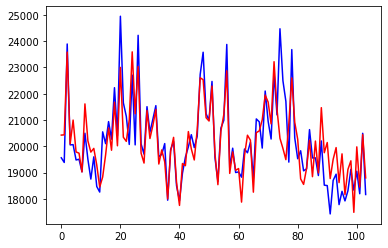

In [201]:
plt.plot(data['NewVolSales'] , 'b')
plt.plot(prd , 'r')

In [202]:
residuals = reg.resid
type(residuals)

pandas.core.series.Series

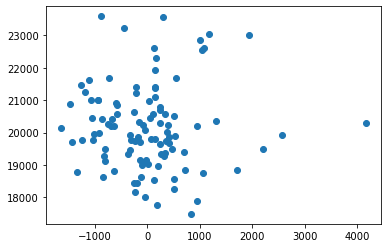

In [204]:
plt.scatter(residuals , prd)

In [207]:
#MAE
mae=met.mean_absolute_error(data['NewVolSales'] , prd)
mae

633.2021343195172

In [208]:
#MAPE
np.mean(abs((data['NewVolSales']-prd)/data['NewVolSales']))

0.03099218043728047

In [210]:
Y,X = dmatrices('NewVolSales~Base_Price+InStore+Discount+TV+Stout' , data=data , return_type = 'dataframe')

In [211]:
X.head()

,Intercept,Base_Price,InStore,Discount,TV,Stout
0,1.0,15.03,15.45,0.00,101.78,2.28
1,1.0,15.03,16.39,0.00,76.73,2.22
2,1.0,14.59,62.69,0.05,131.59,2.01
3,1.0,15.33,16.57,0.00,119.63,2.20
4,1.0,15.64,41.50,0.04,103.44,1.82


In [213]:
Y.head()

,NewVolSales
0,19564.0
1,19387.0
2,23889.0
3,20055.0
4,20064.0


In [217]:
#VIF
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1]) ]
vif['Features'] = X.columns

In [220]:
vif.round(decimals=2)

,VIF Factor,Features
0,1245.98,Intercept
1,1.08,Base_Price
2,2.19,InStore
3,2.24,Discount
4,1.06,TV
5,1.02,Stout
